In [3]:
!pwd

!tar -cvf 3.tar ../../

/home/hanxiaoyang/ml7/0.Teacher/Exercise


***

## Pandas第一课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。
***

## 作业

##### 说明：我们下面做的这一系列操作都属于数据预处理的范畴。在做实际machine learning问题的时候，很多时候我们都需要对数据进行预处理操作，方便后续的建模。


#### 1.构建三个Series，分别是一系列商品的单价，计量单位，和数量。至于是什么商品什么计量单位由大家自己决定。


In [1]:
import pandas as pd
import numpy as np
%config ZMQInteractiveShell.ast_node_interactivity="all"
#### 2.然后把这三个Series合并成一个DataFrame

In [6]:
s1 = pd.Series({"price":2.58,"unit":"kg","count":5})
s2 = pd.Series({"price":2.58,"unit":"kg","count":5})
s3 = pd.Series({"price":2.58,"unit":"kg","count":5})
s1
s2
s3

frame = pd.DataFrame(data=[s1,s2,s3])
frame

count       5
price    2.58
unit       kg
dtype: object

count       5
price    2.58
unit       kg
dtype: object

count       5
price    2.58
unit       kg
dtype: object

,count,price,unit
0,5,2.58,kg
1,5,2.58,kg
2,5,2.58,kg


#### 3.请同学们自行从yahoo finance下载一些股票数据，然后用read_csv载入并作出折线图


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-14,150.850006,151.270004,149.220001,150.000000,149.359421,32439200
2019-01-15,150.270004,153.389999,150.050003,153.070007,152.416321,28710900
2019-01-16,153.080002,155.880005,153.000000,154.940002,154.278336,30569700
2019-01-17,154.199997,157.660004,153.259995,155.860001,155.194397,29821200
2019-01-18,157.500000,157.880005,155.979996,156.820007,156.150314,33751000


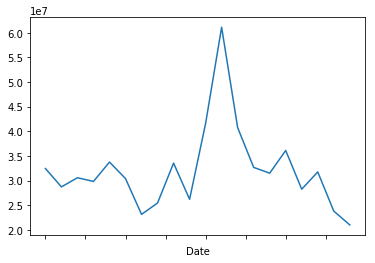

In [15]:
data = pd.read_csv("./AAPL.csv",sep=",",index_col="Date")
data.head()
%matplotlib inline
data.Volume.plot()


#### 4. 0.Teacher/data/文件夹下有个文件叫做titanic.csv ，这个文件包含了在titanic事件中乘客的存活情况。请把这个文件读入成一个pandas dataframe

In [40]:
data = pd.read_csv("../../Data/titanic.csv")
data.head()
type(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


pandas.core.frame.DataFrame

#### 5.把每一列中的sex，sex为male的都改成1，sex为female的改成0,

In [45]:
# 方法一 data.Sex = data.Sex.apply(lambda x:1 if x=="male" else 0)
# 方法二
data.loc[data["Sex"]=="male",["Sex"]] = 1
data.loc[data["Sex"] == "female" ,["Sex"]] = 0
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


#### 6.把Cabin中的NaN都填充成0 (使用fillna方法)

In [47]:
data.Cabin.fillna(value=0,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


#### 7.现在我们想把乘客按照年龄做一个分类
- 年龄在0-11岁的为0类,12-22为1类，23-33为2类，34-44为3类，45-55为4类，56-66为5类，其余为6类
- 请做把Age改成乘客的年龄类别，如果年龄有缺失，就放入乘客的平均年龄


In [55]:
data.Age.fillna(value=data.Age.mean().round(),inplace=True)
data.head(10)

def classfy(age):
    if age>=0 and age<=11:
        return "0类"
    elif age>=12 and age<=22:
        return "1类"
    elif age>=23 and age<=33:
        return "2类"
    elif age>=34 and age<=44:
        return "3类"
    elif age>=45 and age<=55:
        return "4类"
    elif age>=56 and age<=66:
        return "5类"
    else:
        return "6类"

data.Age = data.Age.apply(lambda x:classfy(x))
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,30.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1类,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3类,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,2类,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3类,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,3类,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,2类,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,4类,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0类,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,2类,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1类,1,0,237736,30.0708,0,C
